[Qiskit](https://qiskit.org/documentation/index.html) is an open source programming language
developped by IBM and built on top of the Python programming language. It integrates with [OpenQASM](openqasm.html) (with some hopefully temporary friction around OpenQASM versioning). In fact, Qiskit more accurately refers to a family of integrated frameworks for quantum computation. The most important of these are:

* **[Qiskit Terra](https://qiskit.org/documentation/apidoc/terra.html)**, a circuit description language with a Python-like syntax and the foundation of the Qiskit software stack. It also includes tools for the visualisation of circuits and quantum states, and for the optimisation of circuits for specific hardware devices.

* **[Qiskit Aer](https://qiskit.org/documentation/apidoc/aer.html)**, which provides facilities for classically simulating those circuits, along with realistic noise models for those simultations.

Along with classical simulations, Qiskit can also be used to interact with various [quantum hardware providers](https://qiskit.org/documentation/partners/) in the cloud.

# Tutorial

## Describing quantum circuits

Qiskit is provided as a set of packages for Python. As a result, its syntax follows the rules of Python. For starters, we import the package as usual:

In [1]:
import qiskit as qs

The core class for describing a quantum circuit in Qiskit is, unsurprisingly, the `QuantumCircuit` class. Its constructor takes up to two integer arguments, used to specificy the number of quantum and classical registers (qubits and bits):

In [2]:
qc1 = qs.QuantumCircuit(4) # Construct a QuantumCircuit with 4 qubits
qc2 = qs.QuantumCircuit(4,3) # ... or with 4 qubits and 3 bits

We can then enact gates on the circuit by calling the corresponding methods of the class:

In [3]:
qc1.h(0)
qc1.cx(0,1)
qc1.cx(3,1)

We can then visualise this circuit with `qc1.draw()`:

In [4]:
qc1.draw()

┌───┐          
q_0: ┤ H ├──■───────
     └───┘┌─┴─┐┌───┐
q_1: ─────┤ X ├┤ X ├
          └───┘└─┬─┘
q_2: ────────────┼──
                 │  
q_3: ────────────■──

As you can see, the register of qubits is 0-indexed. Qiskit implements a large number of quantum gates in this way. Rather than listing them all here, we instead refer to the class [documentation](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html) (or equivalently to calling `help(qs.QuantumCircuit)` within Python).

Measurements are a little different: they of course require access to a classical bit to store the outcome of the measurement.

In [5]:
qc2.h(0)
qc2.cx(0,1)
qc2.cx(3,1)

qc2.measure(3,0)

qc2.draw()

┌───┐             
q_0: ┤ H ├──■──────────
     └───┘┌─┴─┐┌───┐   
q_1: ─────┤ X ├┤ X ├───
          └───┘└─┬─┘   
q_2: ────────────┼─────
                 │  ┌─┐
q_3: ────────────■──┤M├
                    └╥┘
c: 3/════════════════╩═
                     0

We can also initialise qubits with the following syntax:

In [6]:
qc3 = qc1.copy()
qc3.initialize([0,1], 2)
qc3.draw()

┌───┐                 
q_0: ───────┤ H ├─────────■───────
            └───┘       ┌─┴─┐┌───┐
q_1: ───────────────────┤ X ├┤ X ├
     ┌─────────────────┐└───┘└─┬─┘
q_2: ┤ Initialize(0,1) ├───────┼──
     └─────────────────┘       │  
q_3: ──────────────────────────■──

The first argument to `initialize` describes a qubit state as a pair of coefficients in the computational basis. The second argument describes the target qubit in the circuit for initialisation.

We can then compose circuits with matching registers simply by "summing" them:

In [7]:
qc4 = qs.QuantumCircuit(4)

qc4.cx(2,3)
qc4.cx(1,3)

qc1.compose(qc4).draw()

┌───┐                    
q_0: ┤ H ├──■─────────────────
     └───┘┌─┴─┐┌───┐          
q_1: ─────┤ X ├┤ X ├───────■──
          └───┘└─┬─┘       │  
q_2: ────────────┼────■────┼──
                 │  ┌─┴─┐┌─┴─┐
q_3: ────────────■──┤ X ├┤ X ├
                    └───┘└───┘

We can also `QuantumCircuit` whose quantum register is split into named subregisters. In order to understand this, we first need to introduce the `QuantumRegister` class, with an optional name:

In [8]:
qreg1 = qs.QuantumRegister(2,"register1")
qreg2 = qs.QuantumRegister(2,"register2")

`ClassicalRegister` has an analogous syntax for constructing classical registers. Then, we can build a `QuantumCircuit` from these registers:

In [9]:
qc5 = qs.QuantumCircuit(qreg1, qreg2)

qc5.h(0)
qc5.cx(qreg1[0],qreg1[1])
qc5.cx(qreg2[1],qreg1[0])

qc5.draw()

┌───┐     ┌───┐
register1_0: ┤ H ├──■──┤ X ├
             └───┘┌─┴─┐└─┬─┘
register1_1: ─────┤ X ├──┼──
                  └───┘  │  
register2_0: ────────────┼──
                         │  
register2_1: ────────────■──

Finally, we can output a `QuantumCircuit` to an OpenQASM 2.0 string using the `qasm` method:

In [10]:
print(qs.qasm3.dumps(qc5))

OPENQASM 3.0;
include "stdgates.inc";
qubit[2] register1;
qubit[2] register2;
h register1[0];
cx register1[0], register1[1];
cx register2[1], register1[0];



## Simulating and running quantum circuits

As described above, Qiskit also makes it possible to interact with various quantum hardward providers, as well as to run a simulation of a given quantum circuit on a classical backend. This allows one to extract (real or simulated) output states or outcome probabilites for measurements. The frontend for running circuits on actual quantum hardware is described in the [documentation](https://qiskit.org/documentation/partners/) and depends on the provider in question.

We focus here on the classical simulation backends. These are provided via the `qiskit.providers.aer` submodule, specifically the [`AerSimulator`](https://qiskit.org/documentation/stubs/qiskit_aer.AerSimulator.html#qiskit_aer.AerSimulator) class.

In [11]:
from qiskit_aer import AerSimulator

In order to run the simulation, we need to set a initial state for each qubit. Here is an elementary example:

In [12]:
qc5 = qs.QuantumCircuit(1,0)
qc5.initialize([1,0],0)
qc5.h(0)
qc5.draw()

┌─────────────────┐┌───┐
q: ┤ Initialize(1,0) ├┤ H ├
   └─────────────────┘└───┘

And we can then run a simulation with:

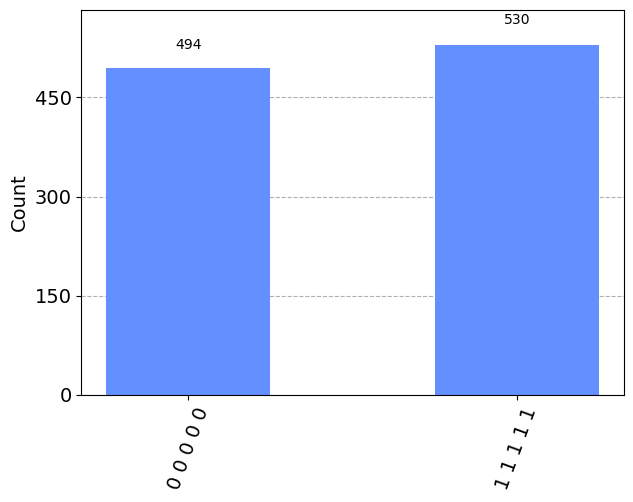

In [20]:
simulator = AerSimulator()
qc5.measure_all()
qc5 = qs.transpile(qc5, simulator)
result = simulator.run(qc5).result()
counts = result.get_counts(qc5)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)


Although the topic is beyond the scope of this tutorial, one of the main selling points of Qiskit Aer is that it provides [realistic noise models](https://qiskit.org/documentation/apidoc/aer_noise.html) for simulating quantum circuits run on NISQ devices.

# Deutsch-Jozsa algorithm

For a complete explanation, see [here](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html).

Let first define an the oracle circuit:

In [17]:
# initialization
import numpy as np
    
# importing Qiskit
from qiskit import QuantumCircuit

# set the length of the n-bit input string. 
n = 3
    
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

Then we can run the Deutsch-Jozsa algorithm with this oracle:

In [18]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
    
# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
    
# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
    
# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()
    
# Measure
for i in range(n):
    dj_circuit.measure(i, i)
    
# Display circuit
dj_circuit.draw()

┌───┐┌───┐ ░                 ░ ┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├┤ H ├─░─┤M├──────
     ├───┤└───┘ ░   │             ░ ├───┤└───┘ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├──────░──╫─┤M├───
     ├───┤┌───┐ ░   │    │        ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░            ░  ║  ║  ║ 
c: 3/═════════════════════════════════════════════╩══╩══╩═
                                                  0  1  2

A range of official [Jupyter notebooks](https://github.com/Qiskit/qiskit-tutorials) are also provided which give further examples of quantum comptutation in the language.'

In [19]:
print(qs.qasm3.dumps(dj_circuit))

OPENQASM 3.0;
include "stdgates.inc";
bit[3] c;
qubit[4] q;
h q[0];
h q[1];
h q[2];
x q[3];
h q[3];
x q[0];
x q[2];
barrier q[0], q[1], q[2], q[3];
cx q[0], q[3];
cx q[1], q[3];
cx q[2], q[3];
barrier q[0], q[1], q[2], q[3];
x q[0];
x q[2];
h q[0];
h q[1];
h q[2];
barrier q[0], q[1], q[2], q[3];
c[0] = measure q[0];
c[1] = measure q[1];
c[2] = measure q[2];

